In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


df = pd.read_csv(r"C:\Users\DELL\Desktop\laptop.csv")
df = df.drop('Unnamed: 0', axis=1)


In [7]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [8]:
df.tail()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
233,Lenovo,4,IPS Panel,2,1,7,35.560,2.6,8,256,1.70,1891
234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883
237,Toshiba,3,Full HD,2,1,5,35.560,2.3,8,256,1.95,1499


In [9]:
df.shape

(238, 12)

In [10]:
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_cm  234 non-null    float64
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       233 non-null    float64
 11  Price           238 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 22.4+ KB


In [12]:
df.describe()

,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,0.776533,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699
min,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,4.000000,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,5.000000,3.000000,2.000000,7.000000,43.942000,2.900000,16.000000,256.000000,3.600000,3810.000000


In [13]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [14]:
df[df['Screen_Size_cm'].isna() == True]

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
120,Dell,4,Full HD,2,1,5,NaN,1.6,8,256,1.42,2340
151,Dell,5,Full HD,3,1,7,NaN,2.8,8,256,2.06,2240
187,Samsung,4,Full HD,2,1,7,NaN,2.7,8,256,1.31,2031
230,Dell,4,Full HD,2,1,5,NaN,2.5,8,256,1.36,1870


In [15]:
avg_screen_size = df['Screen_Size_cm'].mean()
df['Screen_Size_cm'] = df['Screen_Size_cm'].fillna(avg_screen_size)

In [16]:
avg_Weight_kg = df['Weight_kg'].mean()
df['Weight_kg'] = df['Weight_kg'].fillna(avg_Weight_kg)

In [17]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

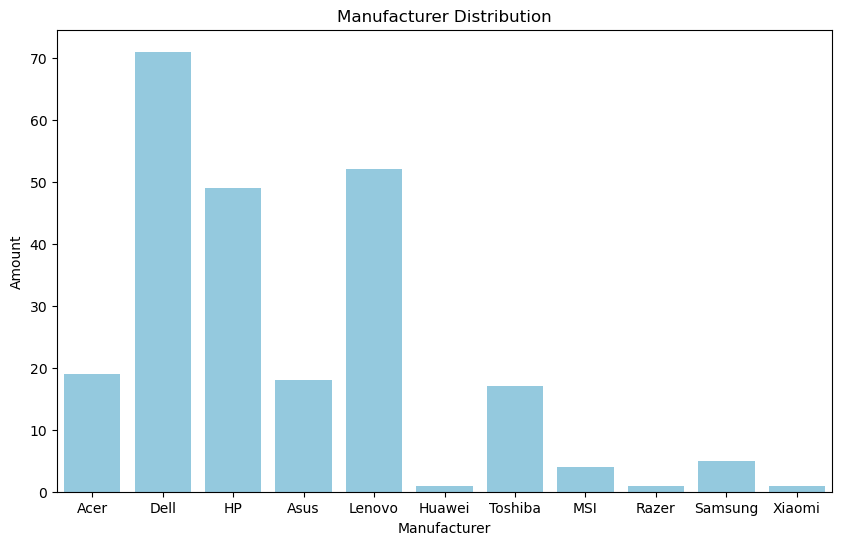

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Manufacturer', data=df, color='skyblue')
plt.xlabel('Manufacturer')
plt.ylabel('Amount')
plt.title('Manufacturer Distribution')

plt.show()

In [33]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                Category       GPU        OS  CPU_core  Screen_Size_cm  \
Category        1.000000 -0.114174 -0.043378  0.232425       -0.305035   
GPU            -0.114174  1.000000 -0.199549  0.145388        0.152979   
OS             -0.043378 -0.199549  1.000000  0.016954        0.150835   
CPU_core        0.232425  0.145388  0.016954  1.000000        0.037293   
Screen_Size_cm -0.305035  0.152979  0.150835  0.037293        1.000000   
CPU_frequency  -0.053414  0.291439  0.050407  0.242722       -0.002262   
RAM_GB          0.030127  0.218973 -0.074625  0.473075        0.017651   
Storage_GB_SSD  0.038246  0.094288  0.007751  0.400015        0.116368   
Weight_kg      -0.381032  0.262853  0.120858  0.068599        0.810703   
Price           0.286243  0.288298 -0.221730  0.459398       -0.126672   

                CPU_frequency    RAM_GB  Storage_GB_SSD  Weight_kg     Price  
Category            -0.053414  0.030127        0.038246  -0.381032  0.286243  
GPU                  0.2914

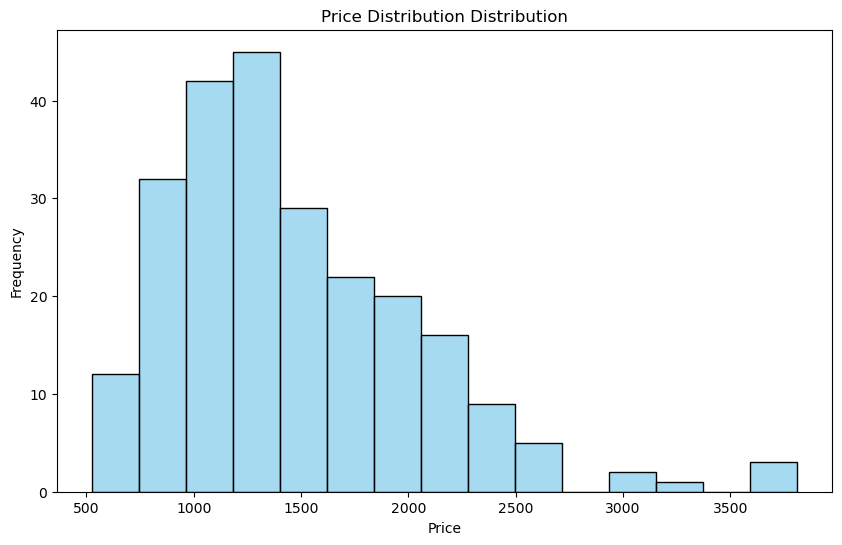

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Distribution')

plt.show()

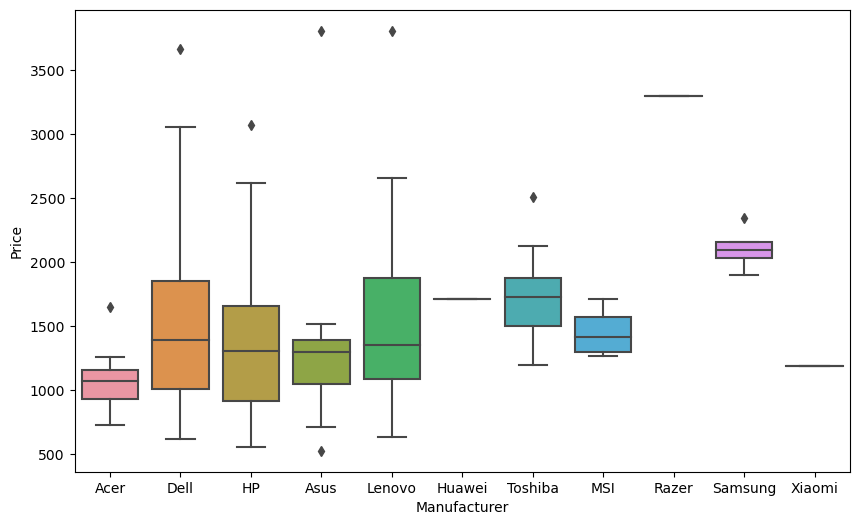

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Manufacturer', y='Price', data=df)
plt.xlabel('Manufacturer')
plt.ylabel('Price')

plt.show()

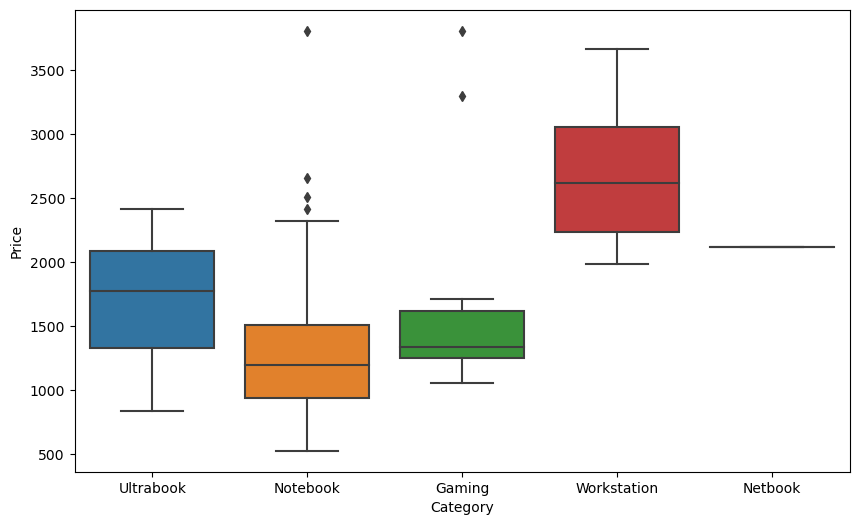

In [21]:
category_mapping = {1: 'Gaming', 2: 'Netbook', 3: 'Notebook', 4: 'Ultrabook', 5: 'Workstation'}
df['Category_Label'] = df['Category'].map(category_mapping)


plt.figure(figsize=(10,6))
sns.boxplot(x='Category_Label', y='Price', data=df)
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

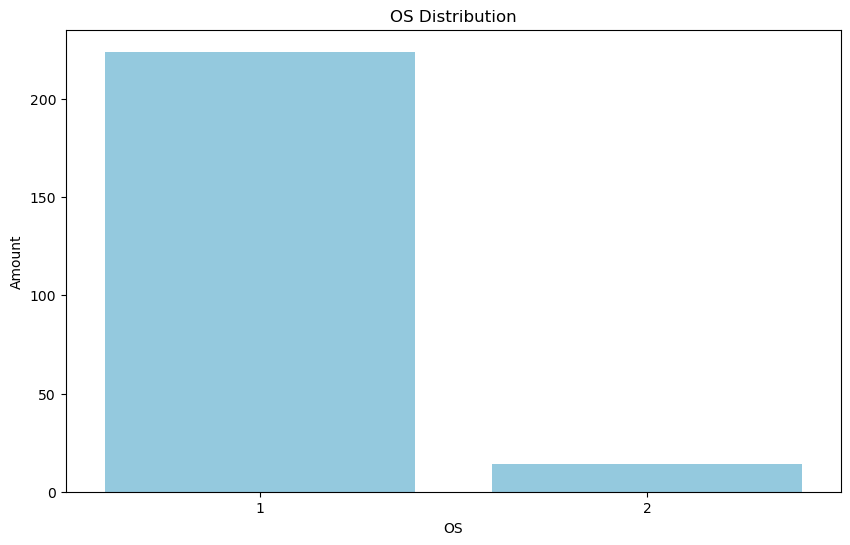

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='OS', data=df, color='skyblue')
plt.xlabel('OS')
plt.ylabel('Amount')
plt.title('OS Distribution')

plt.show()

In [23]:
linux_laptops = df[df['OS'] == 2].sort_values(by='Price',ascending=True)
linux_laptops

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Category_Label
12,Asus,3,Full HD,2,2,3,39.624,2.0,4,256,2.000000,527,Notebook
25,Dell,3,Full HD,1,2,3,39.624,2.0,4,256,2.200000,616,Notebook
112,Asus,3,Full HD,2,2,5,39.624,2.5,4,256,2.000000,710,Notebook
154,Dell,3,Full HD,1,2,5,39.624,2.5,4,128,2.180000,723,Notebook
105,Dell,3,Full HD,1,2,5,39.624,2.5,4,256,2.300000,761,Notebook
56,Dell,3,Full HD,1,2,5,39.624,1.6,8,256,2.200000,860,Notebook
68,Dell,3,Full HD,1,2,7,39.624,1.8,8,256,1.862232,934,Notebook
146,Dell,3,Full HD,1,2,7,39.624,2.7,8,256,2.200000,951,Notebook
101,Dell,3,Full HD,1,2,7,39.624,2.7,8,256,2.330000,989,Notebook
104,Acer,3,Full HD,3,2,7,39.624,2.8,8,256,2.500000,1117,Notebook


In [24]:
windows_laptops = df[df['OS'] == 1]
windows_laptops.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Category_Label
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978,Ultrabook
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634,Notebook
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946,Notebook
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244,Ultrabook
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837,Ultrabook


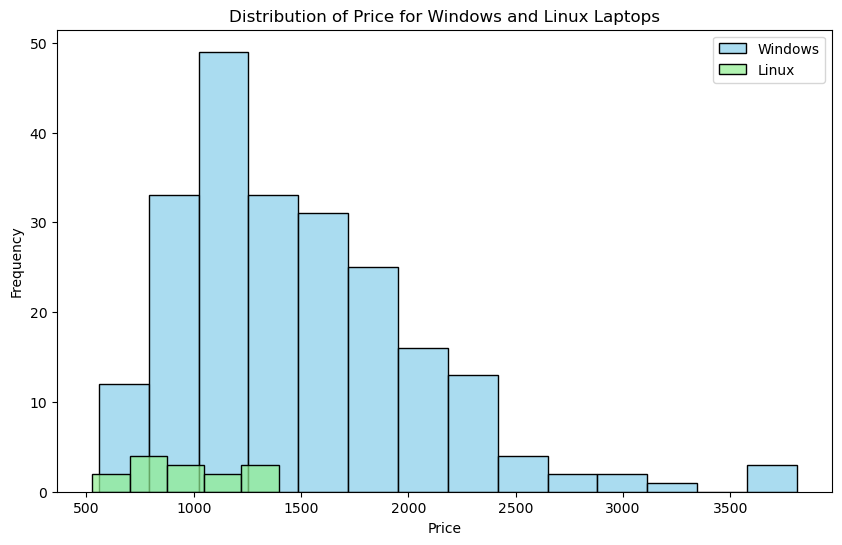

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(windows_laptops['Price'], label='Windows', color='skyblue', alpha=0.7)
sns.histplot(linux_laptops['Price'], label='Linux', color='lightgreen', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price for Windows and Linux Laptops')
plt.legend()
plt.show()

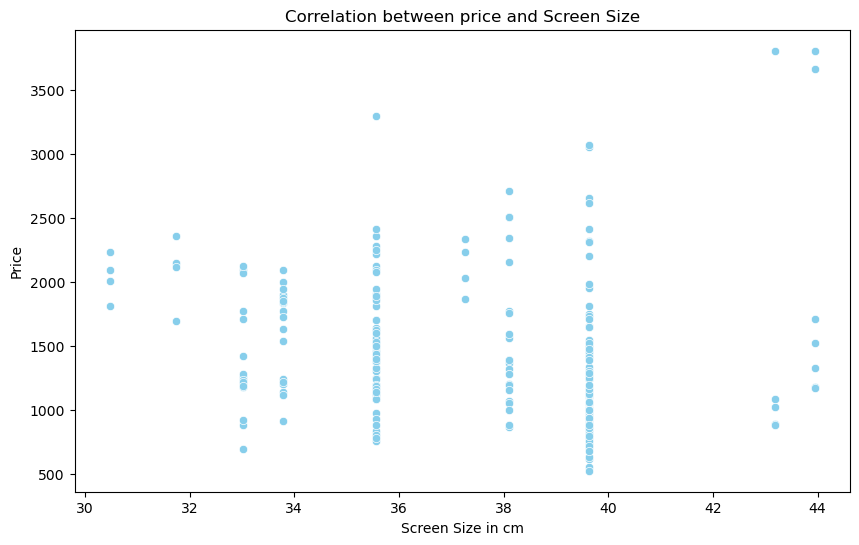

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Screen_Size_cm', y='Price',data=df, color='skyblue')
plt.xlabel('Screen Size in cm')
plt.ylabel('Price')
plt.title('Correlation between price and Screen Size')

plt.show()

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

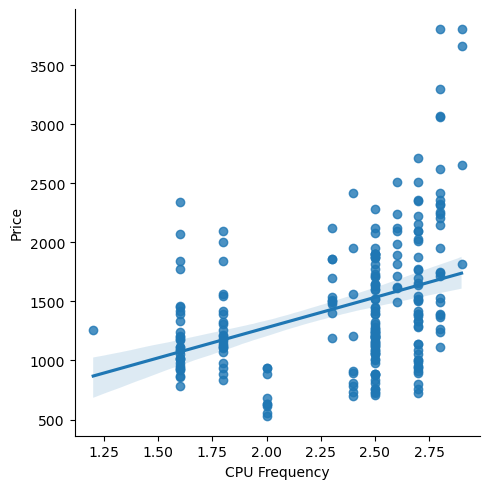

In [27]:
plt.figure(figsize=(10,8))
sns.lmplot(x='CPU_frequency', y='Price', data=df)
plt.xlabel('CPU Frequency')
plt.ylabel('Price')
plt.show()

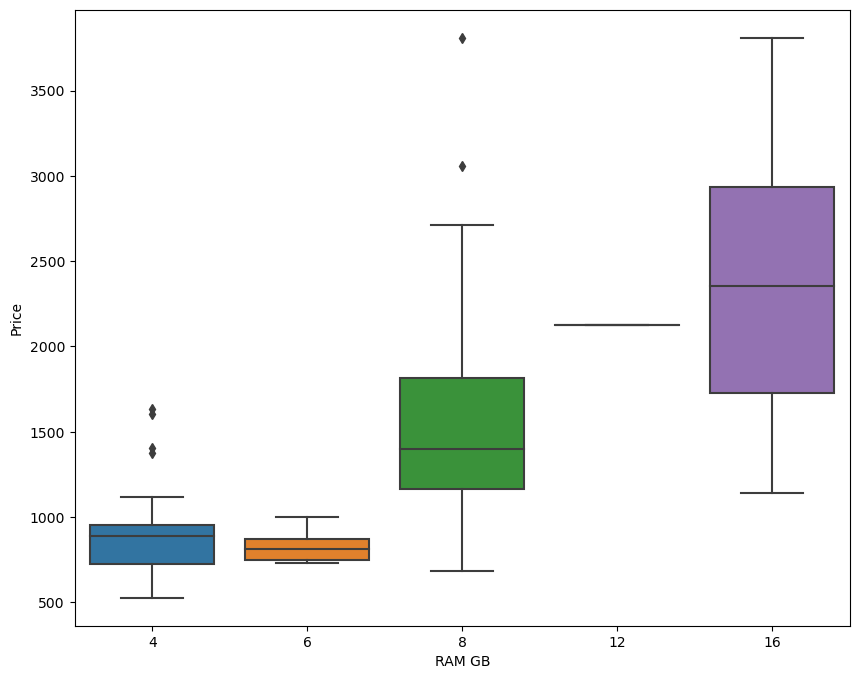

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(x='RAM_GB', y='Price', data=df)
plt.xlabel('RAM GB')
plt.ylabel('Price')
plt.show()

In [29]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
Category_Label     object
dtype: object

In [30]:
laptop_features = ['Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_kg']
y=df.Price

X = df[laptop_features]
X.describe()

,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232
std,0.776533,0.638282,0.235790,1.241787,2.946184,0.411393,2.482603,34.765316,0.489090
min,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000
25%,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.472500
50%,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.862232
75%,4.000000,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000
max,5.000000,3.000000,2.000000,7.000000,43.942000,2.900000,16.000000,256.000000,3.600000


In [31]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

laptop_model = DecisionTreeRegressor(random_state=1)

laptop_model.fit(train_X, train_y)

val_predictions = laptop_model.predict(val_X)

mean_absolute_error(val_y, val_predictions)

282.4

In [32]:
print('Making predictions for the following laptops:')
print(X.tail())

print("The predictions are")
print(laptop_model.predict(X.tail()))

Making predictions for the following laptops:
     Category  GPU  OS  CPU_core  Screen_Size_cm  CPU_frequency  RAM_GB  \
233         4    2   1         7          35.560            2.6       8   
234         3    2   1         5          33.782            2.4       8   
235         4    2   1         5          30.480            2.6       8   
236         3    3   1         5          39.624            2.5       6   
237         3    2   1         5          35.560            2.3       8   

     Storage_GB_SSD  Weight_kg  
233             256       1.70  
234             256       1.20  
235             256       1.36  
236             256       2.40  
237             256       1.95  
The predictions are
[1891. 1950. 2236.  883. 1499.]
